# 4.10 Task 1.ipynb — TOC

	1.	Setup (imports + paths)
	2.	Security implications (privacy/PII handling)
	3.	Regional segmentation
        3.1 Define regions
        3.2 Assign regions (loc)
        3.3 Regional spending habits
	4.	Flag user activity
	5.	Customer profiling
        5.1 Age groups
        5.2 Income groups
        5.3 Parental status
        5.4 Aggregate customer profile
        5.5 Baby status
	6.	Exports / outputs

# Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import datasets
path = r'/Users/spencer/Documents/Career Foundry/Data Immersion/4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

# Security Implications

In [3]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'user_avg_item_price', 'spending_habit', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'family_status',
       'income'],
      dtype='object')

In [4]:
# Drop PII columns
df = df.drop(columns=['first_name', 'surname'])

In [5]:
# Check to ensure they are gone
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'user_avg_item_price', 'spending_habit', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'family_status', 'income'],
      dtype='object')

# Regional Segmentation

In [6]:
# View States
df['state'].value_counts()

state
Pennsylvania            667728
California              660419
Rhode Island            657651
Georgia                 657084
New Mexico              655180
Arizona                 654536
North Carolina          652322
Oklahoma                652256
Alaska                  649022
Minnesota               648407
Massachusetts           647017
Wyoming                 644921
Virginia                642097
Missouri                641310
Texas                   641037
Colorado                639810
Maine                   639163
North Dakota            638988
Alabama                 638634
Louisiana               638171
Kansas                  638010
Delaware                637465
South Carolina          637400
Oregon                  636955
Arkansas                636733
New York                636698
Nevada                  636686
Montana                 635826
South Dakota            634353
Illinois                633463
Hawaii                  633439
Washington              633432
Mi

## Define the regions

In [7]:
region_northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [8]:
region_midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
region_south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [10]:
region_west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

## Assign the regions with loc

In [11]:
df.loc[df['state'].isin(region_northeast), 'region'] = 'Northeast'

In [12]:
df.loc[df['state'].isin(region_midwest), 'region'] = 'Midwest'

In [13]:
df.loc[df['state'].isin(region_south), 'region'] = 'South'

In [14]:
df.loc[df['state'].isin(region_west), 'region'] = 'West'

In [15]:
# Check the output
df['region'].value_counts(dropna=False)

region
South        10801796
West          8300481
Midwest       7603861
Northeast     5728351
Name: count, dtype: int64

## Regional Spending Habits

In [16]:
# Create a crosstab
crosstab = pd.crosstab(df['region'], df['spending_habit'], dropna = False)

In [17]:
crosstab

spending_habit,High spender,Low spender
region,,
Midwest,29298,7574563
Northeast,18662,5709689
South,40643,10761153
West,31275,8269206


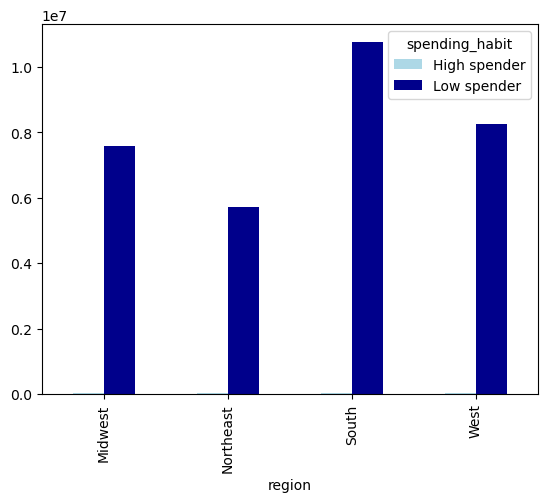

In [18]:
# Create a bar chart
bar_chart = crosstab.plot.bar(color=['lightblue', 'darkblue'])

In [19]:
# Export chart
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending_habits.png'))

# Flag User Activity

In [20]:
# Create the activity flag
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [21]:
# Check the count of each flag
df['activity_flag'].value_counts(dropna = False)

activity_flag
High activity    30992966
Low activity      1441523
Name: count, dtype: int64

In [22]:
# Create a subset of ONLY high activity customers
df_active = df[df['activity_flag'] == 'High activity']

In [23]:
# Check the shape to verify rows were dropped
df_active.shape

(30992966, 33)

In [24]:
# Export the active customers data
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_active.pkl'))

In [25]:
# Shift dataframe to only high activity customers
df = df_active

# Customer Profiling

## Age Groups

In [26]:
# Create age_group column
df.loc[df['age'] <= 35, 'age_group'] = 'Young Adult'
df.loc[(df['age'] > 35) & (df['age'] < 65), 'age_group'] = 'Middle Aged'
df.loc[df['age'] >= 65, 'age_group'] = 'Senior'

In [27]:
# Check the distribution
df['age_group'].value_counts(dropna=False)

age_group
Middle Aged    14043336
Young Adult     8746864
Senior          8202766
Name: count, dtype: int64

## Income Groups

In [28]:
# Create income_group column
df.loc[df['income'] < 50000, 'income_group'] = 'Low Income'
df.loc[(df['income'] >= 50000) & (df['income'] <= 120000), 'income_group'] = 'Middle Income'
df.loc[df['income'] > 120000, 'income_group'] = 'High Income'

In [29]:
# Check the distribution
df['income_group'].value_counts(dropna=False)

income_group
Middle Income    18439343
High Income       9187451
Low Income        3366172
Name: count, dtype: int64

## Parental Status

In [30]:
# Create dependent_flag
df.loc[df['number_of_dependents'] > 0, 'dependent_flag'] = 'Parent'
df.loc[df['number_of_dependents'] == 0, 'dependent_flag'] = 'Non-parent'

In [31]:
# Check the distribution
df['dependent_flag'].value_counts(dropna=False)

dependent_flag
Parent        23245875
Non-parent     7747091
Name: count, dtype: int64

## Aggregate Customer Profile 

In [32]:
# Young Parent
df.loc[(df['age_group'] == 'Young Adult') & (df['dependent_flag'] == 'Parent'), 'customer_profile'] = 'Young Parent'

In [33]:
# Single Adult
df.loc[(df['age_group'] == 'Young Adult') & (df['dependent_flag'] == 'Non-parent'), 'customer_profile'] = 'Single Adult'

In [34]:
# Middle Aged Parent
df.loc[(df['age_group'] == 'Middle Aged') & (df['dependent_flag'] == 'Parent'), 'customer_profile'] = 'Middle Aged Parent'

In [35]:
# Single Senior
df.loc[(df['age_group'] == 'Senior') & (df['dependent_flag'] == 'Non-parent'), 'customer_profile'] = 'Single Senior'

In [36]:
# Senior Parent
df.loc[(df['age_group'] == 'Senior') & (df['dependent_flag'] == 'Parent'), 'customer_profile'] = 'Senior Parent'

In [37]:
# Single Middle Aged
df.loc[(df['age_group'] == 'Middle Aged') & (df['dependent_flag'] == 'Non-parent'), 'customer_profile'] = 'Single Middle Aged'

In [38]:
# Check the distribution
df['customer_profile'].value_counts(dropna=False)

customer_profile
Middle Aged Parent    10499919
Young Parent           6567110
Senior Parent          6178846
Single Middle Aged     3543417
Single Adult           2179754
Single Senior          2023920
Name: count, dtype: int64

In [39]:
# Create customer profile summary
table_profile_summary = df.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean']}).round(2)

In [40]:
table_profile_summary

max_order         prices            days_since_prior_order
                        mean min max   mean  min   max                   mean
customer_profile                                                             
Middle Aged Parent     34.34   5  99   7.79  1.0  25.0                  10.83
Senior Parent          34.29   5  99   7.80  1.0  25.0                  10.80
Single Adult           34.25   5  99   7.78  1.0  25.0                  10.90
Single Middle Aged     35.08   5  99   7.79  1.0  25.0                  10.74
Single Senior          34.44   5  99   7.80  1.0  25.0                  10.77
Young Parent           34.40   5  99   7.79  1.0  25.0                  10.81

## Baby Status

In [41]:
# Create a flag for users who have ordered from the baby department (ID 18)
df['baby_department'] = [1 if x == 18 else 0 for x in df['department_id']]

In [42]:
# Assign flag if user has ever bought from dept 18
df['has_baby_status'] = df.groupby(['user_id'])['baby_department'].transform('max')

In [43]:
# Label the profile for clarity
df.loc[df['has_baby_status'] == 1, 'baby_status'] = 'Baby Household'
df.loc[df['has_baby_status'] == 0, 'baby_status'] = 'Non-baby Household'

In [44]:
# Drop the temp column
df = df.drop(columns=['baby_department'])

In [45]:
# Check the distribution
df['baby_status'].value_counts(dropna=False)

baby_status
Non-baby Household    21172872
Baby Household         9820094
Name: count, dtype: int64

## Visualization

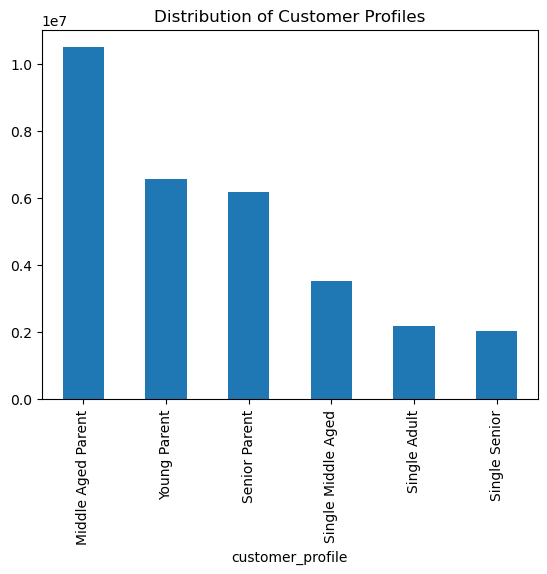

In [46]:
# Create a bar chart for Customer Profile
bar_profile = df['customer_profile'].value_counts().plot.bar(title='Distribution of Customer Profiles')

In [47]:
# Save the visualization
bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

# Aggregate mean, max, and min

In [48]:
# Group by Profile AND Income to see the spending differences
df.groupby(['customer_profile', 'income_group']).agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order  \
                                      mean  min   max                   mean   
customer_profile   income_group                                                
Middle Aged Parent High Income    7.952084  1.0  25.0              10.826983   
                   Low Income     6.602071  1.0  25.0              11.262185   
                   Middle Income  7.889635  1.0  25.0              10.761021   
Senior Parent      High Income    7.962224  1.0  25.0              10.759798   
                   Low Income     6.507588  1.0  25.0              10.977251   
                   Middle Income  7.865051  1.0  25.0              10.806715   
Single Adult       High Income    7.730150  1.0  25.0              10.018627   
                   Low Income     6.930413  1.0  25.0              11.079872   
                   Middle Income  7.949017  1.0  25.0              10.874256   
Single Middle Aged High Income    7.944151  1.0  25.0              10.639177   
                   Low Income     6.584479  1.0  25.0              11.053820   
                   Middle Income  7.892000  1.0  25.0              10.757115   
Single Senior      High Income    7.951989  1.0  25.0              10.702982   
                   Low Income     6.509959  1.0  25.0              11.305158   
                   Middle Income  7.868699  1.0  25.0              10.745063   
Young Parent       High Income    7.816021  1.0  25.0              10.391146   
                   Low Income     6.906106  1.0  25.0              11.247309   
                   Middle Income  7.947407  1.0  25.0              10.731062   

                                             
                                  min   max  
customer_profile   income_group              
Middle Aged Parent High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0  
Senior Parent      High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0  
Single Adult       High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0  
Single Middle Aged High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0  
Single Senior      High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0  
Young Parent       High Income    0.0  30.0  
                   Low Income     0.0  30.0  
                   Middle Income  0.0  30.0

In [49]:
# Aggregation for baby status
df.groupby(['baby_status', 'income_group']).agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices            days_since_prior_order  \
                                      mean   max  min                   mean   
baby_status        income_group                                                
Baby Household     High Income    7.907471  25.0  1.0               9.260659   
                   Low Income     6.968423  25.0  1.0               9.778731   
                   Middle Income  7.891032  25.0  1.0               9.362763   
Non-baby Household High Income    7.974685  25.0  1.0              11.528919   
                   Low Income     6.642765  25.0  1.0              11.526883   
                   Middle Income  7.916265  25.0  1.0              11.474975   

                                             
                                   max  min  
baby_status        income_group              
Baby Household     High Income    30.0  0.0  
                   Low Income     30.0  0.0  
                   Middle Income  30.0  0.0  
Non-baby Household High Income    30.0  0.0  
                   Low Income     30.0  0.0  
                   Middle Income  30.0  0.0

# Compare Customer Profile by Region

In [50]:
# Create a crosstab to compare Customer Profiles and Regions
crosstab_region = pd.crosstab(df['customer_profile'], df['region'], dropna=False)

In [51]:
# Check the table
crosstab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Middle Aged Parent,2480116,1851911,3475209,2692683
Senior Parent,1434983,1107024,2052544,1584295
Single Adult,492056,397769,744688,545241
Single Middle Aged,861948,578830,1181460,921179
Single Senior,470473,379226,658315,515906
Young Parent,1528179,1155320,2208445,1675166


NameError: name 'FuncFormatter' is not defined

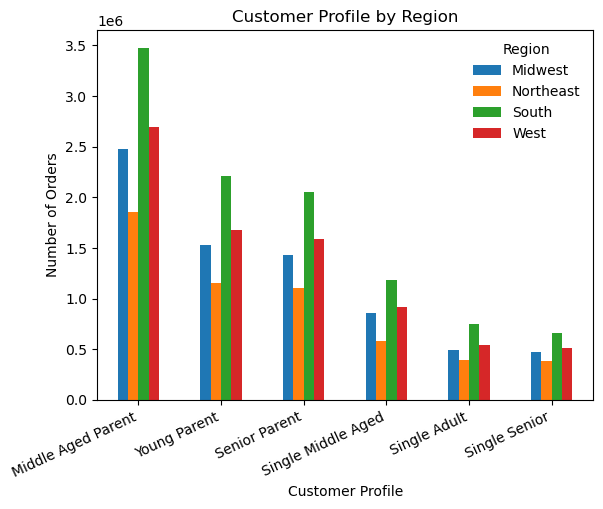

In [52]:
# Optional: enforce a consistent region order (adjust if yours differ)
region_order = ["Midwest", "Northeast", "South", "West"]
cols = [c for c in region_order if c in crosstab_region.columns] or list(crosstab_region.columns)

# Sort profiles by total orders across regions (descending)
ct = (crosstab_region[cols]
      .assign(_total=crosstab_region[cols].sum(axis=1))
      .sort_values("_total", ascending=False)
      .drop(columns="_total"))


# ax = ct.plot(kind="bar", color=['#DEEBF7', '#9ECAE1', '#4292C6', '#084594'])

ax.set_title("Customer Profile by Region")
ax.set_xlabel("Customer Profile")
ax.set_ylabel("Number of Orders")
ax.legend(title="Region", frameon=False)

plt.xticks(rotation=25, ha="right")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1_000_000:.1f}M"))

plt.tight_layout()
plt.show()

In [ ]:
# Export the chart
bar_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_region.png'))

# Compare Customer Profile by Department

## Department ID to name linking

In [ ]:
# Transpose the departments dataframe
df_dept_t = df_dept.T
df_dept_t.reset_index()

In [ ]:
# Create a new header
new_header = df_dept_t.iloc[0] 
df_dept_t = df_dept_t[1:] 
df_dept_t.columns = new_header

In [ ]:
# Check the output to ensure it looks right
df_dept_t

## Create data dictionary and map it

In [ ]:
# Create dictionary
data_dict = df_dept_t.to_dict('index')

In [ ]:
# Flatten result (instead of {1: {'department': 'frozen'}}, we want {1: 'frozen'})
department_dict = {int(key): value['department'] for key, value in data_dict.items()}

In [ ]:
# Map the dictionary to main dataframe
df['department'] = df['department_id'].map(department_dict)

In [ ]:
# Check the result
df[['department_id', 'department']].head()

In [ ]:
# Verify the count
df['department'].value_counts(dropna=False)

In [ ]:
# Fill NaNs with the string 'missing'
df['department'] = df['department'].fillna('missing')

In [ ]:
# Verify the count
df['department'].value_counts(dropna=False)

## Customer Profiles vs Departments

In [ ]:
# Create a crosstab to compare Customer Profiles and Departments
crosstab_dept = pd.crosstab(df['department'], df['customer_profile'], dropna=False)

In [ ]:
crosstab_dept

In [ ]:
# Create a stacked bar chart
bar_dept_profile = crosstab_dept.plot.bar(stacked=True)
plt.title('Department Orders by Customer Profile')
plt.ylabel('Frequency')

In [ ]:
# Export stacked bar chart
bar_dept_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_profile.png'))

In [ ]:
df.shape

# Summary tables for recommendations

In [ ]:
# Create loyalty behavior summary table
table_loyalty_summary = df.groupby('loyalty_flag').agg({
    'max_order': ['mean', 'min', 'max'],
    'prices': ['mean', 'min', 'max'],
    'days_since_prior_order': ['mean']
}).round(2)

In [ ]:
table_loyalty_summary

In [ ]:
# Make price range vs price_label table
price_counts = df['price_label'].value_counts(dropna=False)

In [ ]:
price_pct = (df['price_label'].value_counts(normalize=True, dropna=False) * 100).round(1)

In [ ]:
price_label_mix = pd.concat([price_counts, price_pct], axis=1)

In [ ]:
price_label_mix.columns = ['order_lines', 'percent']

In [ ]:
price_label_mix

In [ ]:
# Make revenue by hour (real order totals + AOV)

# Build order-level totals (sum of prices per order_id)
df_orders = (
    df.groupby("order_id", as_index=False)
      .agg(
          order_hour_of_day=("order_hour_of_day", "first"),
          order_total=("prices", "sum")
      )
)

In [ ]:
# Summarize by hour
hourly_rev = (
    df_orders.groupby("order_hour_of_day", as_index=False)
             .agg(
                 total_revenue=("order_total", "sum"),
                 avg_order_value=("order_total", "mean"),
                 median_order_value=("order_total", "median"),
                 n_orders=("order_total", "size")
             )
             .sort_values("order_hour_of_day")
)

In [ ]:
hourly_rev

In [ ]:
hourly_rev.plot(x="order_hour_of_day", y="total_revenue", kind="bar", figsize=(10,4), legend=False, title="Total revenue by hour")

In [ ]:
hourly_rev.plot(x="order_hour_of_day", y="avg_order_value", kind="line", figsize=(10,4), legend=False, title="Average order value (AOV) by hour")

# Exports

In [ ]:
# Export the final data set with the fixed 'department' column
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final_profiles.pkl'))